# PINNs to Solve Cyclic Voltammetry Problem
**Author**: Mahamat Azibert Abdelwahab

**Institution**: African Institut for Mathematical Science - Research and Innovation Centre

We will solve an inverse problem for ET systems for unknowns $D$ and $D^+$

$$
\begin{aligned}
    \partial_t C_Q - \partial_z(D\partial_z C_Q) &= 0, \quad && \quad (t, z) \in [0,2t_{\lambda}] \times [0, z_1],\\
   \partial_t C_{Q^+} - \partial_z(D^+\partial_z C_{Q^+}) &= 0, \quad &&\quad (t, z) \in [0,2t_{\lambda}] \times [0, z_1].
\end{aligned}
$$

Subject to the boundary conditions:

$$
\begin{aligned}
\partial_z C_{i}(t, z_1) &= 0, \quad \forall i \in {Q, Q^+} \quad && \quad \forall (t, z) \in [0,2t_{\lambda}] \times [0, z_1],\\
D\partial_z C_Q(t, 0)  &= K_f(t)C_Q(t, 0) - K_b(t)C_{Q^+}(t, 0), \quad && \quad \forall t \in [0,2t_{\lambda}], \\
D^+\partial_z C_{Q^+}(t, 0) &= -K_f(t)C_Q(t, 0) + K_b(t)C_{Q^+}(t, 0), \quad && \quad \forall t \in [0,2t_{\lambda}].
\end{aligned}
$$

And the initial condition:

$$
\begin{equation}
C_Q(0, z) = 1, \quad C_{Q^+}(0, z) = 0, \quad \quad \forall z\in [0,z_1].
\end{equation}
$$

Here $C_{i}(t,z)\in\mathbb{R}$ is the dimensionless concentration of the species $i\in \{\mathbf{Q},\mathbf{Q}^{+}\}$ and $D^+\in\mathbb{R}$ is the dimensionless diffusion of the specie $\mathbf{Q}^{+}$. The heterogeneous electron transfer rate constants, $k_b, k_f$, can  be written in its dimensionless form, $K_b, K_f$,  as follows:

$$
\begin{equation}
K_f = K_0\exp[(1-\delta)P], \quad \quad K_b = K_0\exp[(-\delta) P].
\end{equation}
$$

Where the dimensionless potential, $P$, in terms of the dimensionless time, is given by:

$$
\begin{align}
P = \left\lbrace
\begin{array}{ll}
P_1 + t , \; 0\leq t\leq t_\lambda\\
P_2 -  (t - t_\lambda) , \; t_\lambda\leq t\leq 2t_\lambda
\end{array} 
\right.,\qquad
t_\lambda = P_2-P_1,
\end{align}
$$

With $P_1$ and $P_2$ respectively the dimensionless initial and reverse potential. The dimensionless current, $G$, is given by:

$$
\begin{equation}
G(t) = \partial_zC_Q(t, 0)  = K_f(t)C_Q(t, 0) - K_b(t)C_{Q^+}(t, 0), \quad \forall t\in [0,2t_{\lambda}].
\end{equation}
$$

In [1]:
import numpy as np
# Set constants
pi = np.pi
delta = 0.5                       # Electron transfer coefficient
# D_A = 1                           # Ratio of diffusion coefficient of A
# D_plus = 1                        # Ratio of diffusion coefficient of B
K0 = 20                           # Dimensionles electron transfer rate constant
p1 = -10                          # Starting dimensionless potential
p2 = 10                           # End dimensionless potential
D_depth = 5*(2*pi*(p2+8))**0.5
#D_depth = 6*np.sqrt(D*t_max)
t_lambda = p2-p1
ht = 0.1                          # Dimesionless time interval
C_A0 = 1                          # tf.constant(1, dtype=DTYPE)
C_B0 = 0                          # tf.constant(0, dtype=DTYPE)

In [2]:
def dimensionless_potential(t):
    p = np.where(t <= t_lambda, p1 + t, p2 - (t - t_lambda))
    return p

def electron_transfer_rates(P):
    Kf = K0 * np.exp((1 - delta) * P)
    Kb = K0 * np.exp((-delta) * P)
    return Kf, Kb

In [3]:
import deepxde as dde
import numpy as np

2024-09-14 20:45:44.392199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-14 20:45:46.235482: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-14 20:45:46.235655: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-14 20:45:46.235673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

Instructions for updating:
non-resource variables are not supported in the long term


2024-09-14 20:45:49.441670: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-09-14 20:45:49.441778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tljh00-phpckig): /proc/driver/nvidia/version does not exist


# Supervised

In [6]:
import scipy.io
import os
import numpy as np

data_folder = "data"
result_folder = "Results"
image_folder = "Figure"


def read_data(D_plus, K0):
    filename = f"Data_D_{D_plus}_K0_{K0}.mat"
    filename_path = os.path.join(data_folder, filename)
    mat = scipy.io.loadmat(filename_path)

    T_span = mat["T_span"][0]
    Z_set = np.zeros_like(T_span)
    X = np.stack([Z_set, T_span], axis=1)
    G = mat["G"][0]
    pot = mat["pot"][0]
    K0 = mat["K0"][0,0]
    D_plus = mat["D"][0,0]
    return D_plus, K0, X, pot, G

In [19]:
D = 1
D_plus, K0, X, pot, G = read_data(D_plus=5, K0=10)

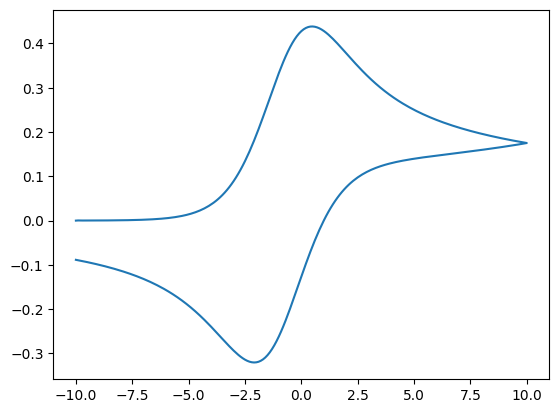

In [20]:
import matplotlib.pyplot as plt

plt.plot(pot, G)
plt.show()

In [21]:
geom = dde.geometry.Interval(0.0, D_depth)
timedomain = dde.geometry.TimeDomain(0.0, 2*t_lambda)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [22]:
def pde(x, y):
    cq_t = dde.grad.jacobian(y, x, i=0, j=1)
    cqp_t = dde.grad.jacobian(y, x, i=1, j=1)
    cq_zz = dde.grad.hessian(y, x, component=0, i=0, j=0)
    cqp_zz = dde.grad.hessian(y, x, component=1, i=0, j=0)
    eq1 = cq_t - D*cq_zz
    eq2 = cqp_t - D_plus*cqp_zz
    return [eq1, eq2]

In [23]:
def boundary_left(x, on_boundary):
    if dde.utils.isclose(x[1], 0.0):
        return False
    return on_boundary and dde.utils.isclose(x[0], 0.0)

def boundary_right(x, on_boundary):
    if dde.utils.isclose(x[1], 0.0):
        return False
    return on_boundary and dde.utils.isclose(x[0], D_depth)

def initial(x, on_initial):
    return on_initial and dde.utils.isclose(x[1], 0.0)

In [24]:
def robin_boundary_condition_cq(x, y):
    t = x[:, 1]
    cq = y[:, 0]
    cqp = y[:, 1]
    P = dimensionless_potential(t)
    k_f, k_b = electron_transfer_rates(P)
    r = (1.0/D)*(k_f*cq - k_b*cqp)
    return r

def robin_boundary_condition_cqp(x, y):
    t = x[:, 1]
    cq = y[:, 0]
    cqp = y[:, 1]
    P = dimensionless_potential(t)
    k_f, k_b = electron_transfer_rates(P)
    r = (1.0/D_plus)*(-k_f*cq + k_b*cqp)
    return r

def dydx(x, y, X):
    return dde.grad.jacobian(y, x, i=0, j=0)

In [25]:
observe_g = dde.icbc.PointSetOperatorBC(X, G.reshape(-1, 1), dydx)

In [31]:
bc1 = dde.icbc.NeumannBC(geomtime, lambda x: 0.0, boundary_right, component=0)
bc2 = dde.icbc.NeumannBC(geomtime, lambda x: 0.0, boundary_right, component=1)
bc3 = dde.icbc.RobinBC(geomtime, robin_boundary_condition_cq, boundary_left, component=0)
bc4 = dde.icbc.RobinBC(geomtime, robin_boundary_condition_cqp, boundary_left, component=1)
ic1 = dde.icbc.IC(geomtime, lambda x: 1.0, initial, component=0)
ic2 = dde.icbc.IC(geomtime, lambda x: 0.0, initial, component=1)

In [32]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [ic1, ic2, bc1, bc2, bc3, bc4, observe_g],
    num_domain=20000,
    num_boundary=1000,
    anchors=X,
    num_initial=1000,
    num_test=2000
)

In [33]:
layer_size = [2] + [20] * 3 + [12] * 3 + [2]
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN(layer_size, activation, initializer)

In [34]:
model = dde.Model(data, net)
loss_weights = [1, 1, 1, 1, 1, 1, 1e-5, 1e-5, 1]
model.compile("adam", lr=0.001, loss_weights=loss_weights)

Compiling model...
Building feed-forward neural network...
'build' took 0.266148 s

'compile' took 3.492131 s



Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [8.43e-04, 1.10e-02, 1.71e+00, 1.50e-02, 1.76e-05, 2.23e-04, 8.30e-01, 3.32e-02, 4.97e-02]    [5.23e-04, 5.71e-03, 1.71e+00, 1.50e-02, 1.76e-05, 2.23e-04, 8.30e-01, 3.32e-02, 4.97e-02]    []  
1000      [7.33e-04, 1.19e-04, 1.24e-05, 1.94e-06, 2.80e-06, 3.05e-06, 4.04e-05, 1.56e-06, 6.38e-03]    [4.67e-04, 1.03e-04, 1.24e-05, 1.94e-06, 2.80e-06, 3.05e-06, 4.04e-05, 1.56e-06, 6.38e-03]    []  
2000      [4.07e-04, 4.25e-05, 3.83e-06, 5.10e-07, 1.38e-06, 1.66e-06, 7.84e-05, 3.05e-06, 5.96e-03]    [2.68e-04, 3.41e-05, 3.83e-06, 5.10e-07, 1.38e-06, 1.66e-06, 7.84e-05, 3.05e-06, 5.96e-03]    []  
3000      [3.72e-04, 2.54e-05, 1.61e-06, 1.96e-06, 5.62e-07, 6.14e-07, 2.60e-04, 1.03e-05, 4.64e-03]    [1.86e-04, 1.58e-05, 1.61e-06, 1.96e-06, 5.62e-07, 6.14e-0

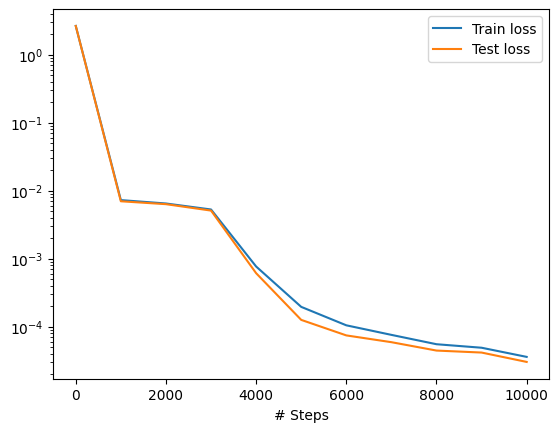

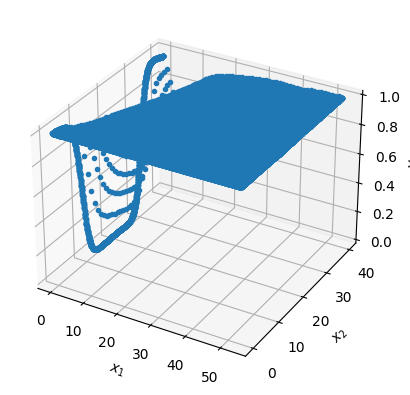

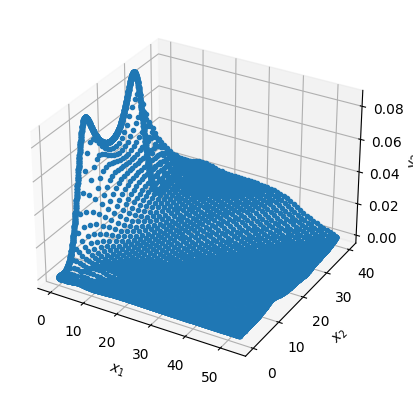

In [35]:
losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [36]:
N = 100
m = 100

# Draw uniformly sampled collocation points
t_r = np.linspace(0, 2*t_lambda, N)
x_r = np.linspace(0, D_depth, m)
X, T = np.meshgrid(x_r, t_r)

Xgrid = np.vstack([X.flatten(), T.flatten()]).T
y_pred = model.predict(Xgrid)

# Reshape upred
Cq = y_pred[:, 0].reshape((m, N))
Cq_plus = y_pred[:, 1].reshape((m, N))

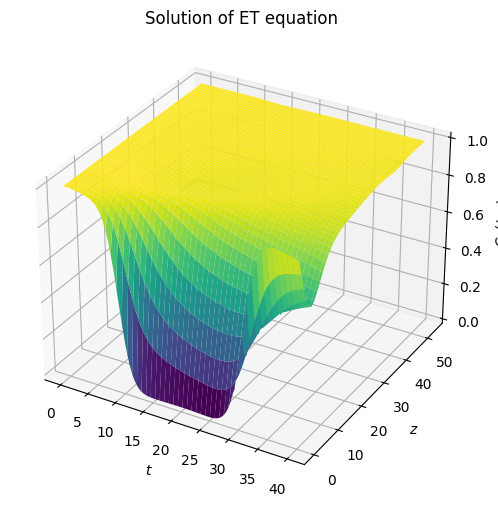

In [37]:
import matplotlib.pyplot as plt

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, Cq, cmap='viridis');
ax.set_xlabel('$t$')
ax.set_ylabel('$z$')
ax.set_zlabel('$C_Q(t, x)$')
ax.set_title('Solution of ET equation');

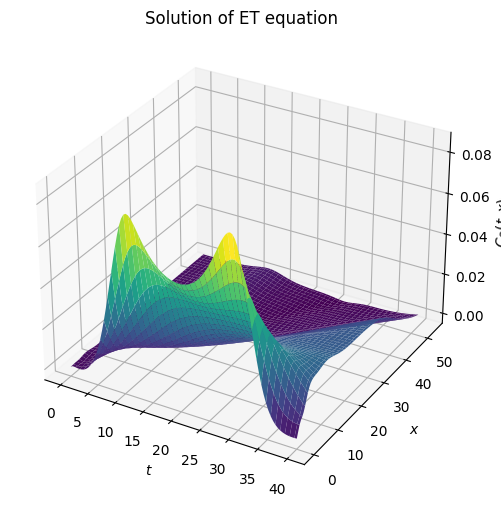

In [38]:
# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, Cq_plus, cmap='viridis');
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$C_Q(t,x)$')
ax.set_title('Solution of ET equation');

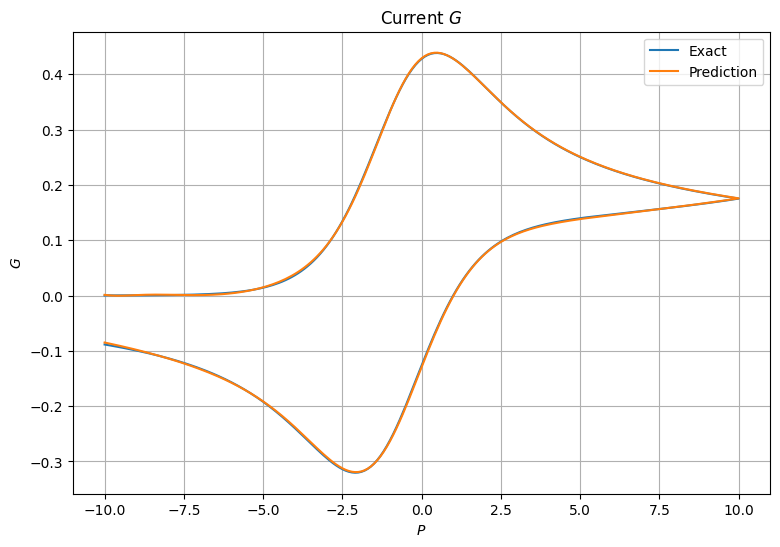

In [50]:
_, _, X, pot, G = read_data(D_plus=5, K0=10)

m = X.shape[0]

t_r = X[:, 1]
x_r = np.linspace(0, D_depth, m)*0.0

X = np.stack([x_r, t_r], axis=1)

def dydz(x, y):
    return dde.grad.jacobian(y, x, i=0, j=0)

G_hat = model.predict(X, operator=dydz)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
plt.plot(pot, G)
plt.plot(pot, G_hat)
plt.xlabel('$P$')
plt.ylabel('$G$')
plt.grid('on')
plt.title('Current $G$')
plt.legend(["Exact", "Prediction"])
plt.show()

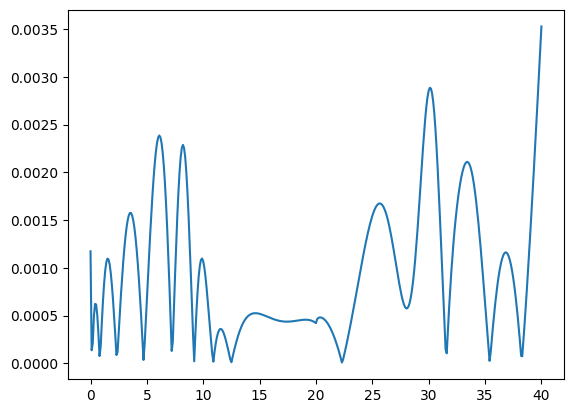

In [46]:
plt.plot(X[:, 1], np.abs(G - G_hat.reshape(-1)))
plt.show();

In [47]:
max(G_hat)

array([0.43886608], dtype=float32)

In [48]:
alpha = 0.5
peak = lambda k: 0.446 + (0.247*np.sqrt(alpha) - 0.223)*(1 - np.tanh(0.63*np.log(k) + 0.189/(1 - alpha) - 0.219))
100*abs(max(G_hat)-peak(20))/max(G_hat)

array([1.263746], dtype=float32)

# Unsupervised Learning

## First Approach

We need to impose in the constraint $G(t=0) = 0$
### $L_{\theta} = \lambda L_{R} + \lambda_I L_{0} + \lambda_N L_{Neuman\_bc} + \lambda_R L_{Robin\_bc} + \lambda_G||\hat{G}||_p$

In [51]:
neuman_bc1 = dde.icbc.NeumannBC(geomtime, lambda x: 0.0, boundary_right, component=0)
neuman_bc2 = dde.icbc.NeumannBC(geomtime, lambda x: 0.0, boundary_right, component=1)
robin_bc1 = dde.icbc.RobinBC(geomtime, robin_boundary_condition_cq, boundary_left, component=0)
robin_bc2 = dde.icbc.RobinBC(geomtime, robin_boundary_condition_cqp, boundary_left, component=1)
initial_1 = dde.icbc.IC(geomtime, lambda x: 1.0, initial, component=0)
initial_2 = dde.icbc.IC(geomtime, lambda x: 0.0, initial, component=1)

N = 100
t_r = np.linspace(0, 2*t_lambda, N)*0.0
x_r = np.linspace(0, D_depth, N)
X = np.stack([x_r, t_r], axis=1)
current_constraint = dde.icbc.PointSetOperatorBC(X, t_r.reshape(-1, 1), dydx)

In [52]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [initial_1, initial_2, neuman_bc1, neuman_bc2, robin_bc1, robin_bc2, current_constraint],
    num_domain=20000,
    num_boundary=1000,
    anchors=X,
    num_initial=1000,
    num_test=2000
)

In [53]:
layer_size = [2] + [20] * 3 + [12] * 3 + [2]
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
loss_weights = [1, 1, 1, 1, 1, 1, 1e-5, 1e-5, 1]
model.compile("adam", lr=0.001, loss_weights=loss_weights)

Compiling model...
Building feed-forward neural network...


/home/jupyter-aakazan/.local/lib/python3.9/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.253472 s

'compile' took 3.451566 s



Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [2.56e-03, 4.68e-03, 1.35e+00, 1.85e-02, 1.69e-04, 2.69e-05, 3.55e-01, 1.42e-02, 5.24e-03]    [1.83e-03, 1.56e-03, 1.35e+00, 1.85e-02, 1.69e-04, 2.69e-05, 3.55e-01, 1.42e-02, 5.24e-03]    []  
1000      [9.55e-05, 3.49e-05, 7.02e-06, 9.51e-06, 6.25e-07, 3.20e-07, 7.30e-06, 2.93e-07, 8.50e-06]    [7.90e-05, 2.51e-05, 7.02e-06, 9.51e-06, 6.25e-07, 3.20e-07, 7.30e-06, 2.93e-07, 8.50e-06]    []  
2000      [3.08e-05, 1.03e-05, 7.76e-07, 1.88e-06, 1.67e-07, 1.13e-07, 3.82e-06, 1.32e-07, 2.52e-06]    [2.28e-05, 9.32e-06, 7.76e-07, 1.88e-06, 1.67e-07, 1.13e-07, 3.82e-06, 1.32e-07, 2.52e-06]    []  
3000      [1.40e-05, 5.24e-06, 1.05e-07, 5.43e-07, 1.19e-07, 7.24e-08, 3.08e-06, 9.17e-08, 9.21e-07]    [1.14e-05, 5.13e-06, 1.05e-07, 5.43e-07, 1.19e-07, 7.24e-0

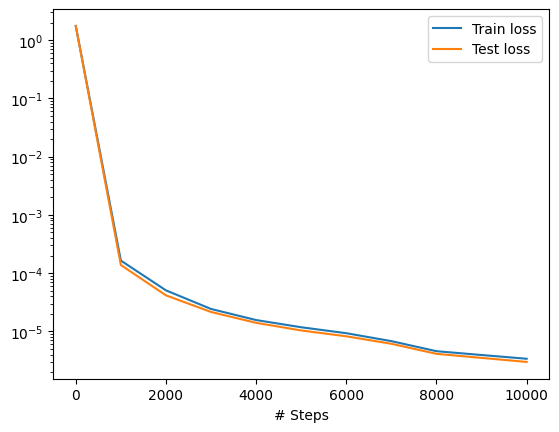

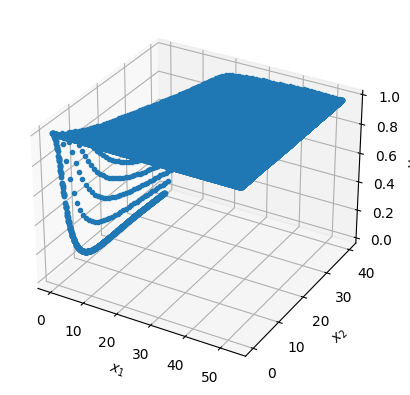

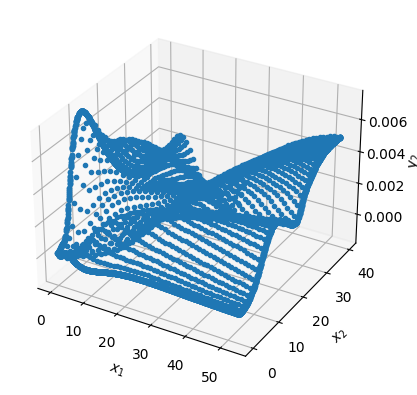

In [54]:
losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [55]:
N = 100
m = 100

# Draw uniformly sampled collocation points
t_r = np.linspace(0, 2*t_lambda, N)
x_r = np.linspace(0, D_depth, m)
X, T = np.meshgrid(x_r, t_r)

Xgrid = np.vstack([X.flatten(), T.flatten()]).T
y_pred = model.predict(Xgrid)

# Reshape upred
Cq = y_pred[:, 0].reshape((m, N))
Cq_plus = y_pred[:, 1].reshape((m, N))

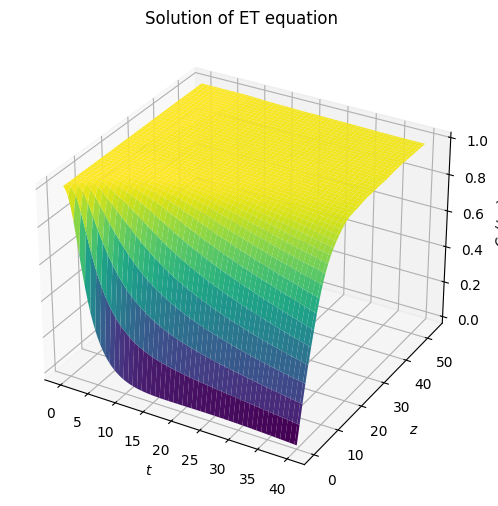

In [56]:
import matplotlib.pyplot as plt

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, Cq, cmap='viridis');
ax.set_xlabel('$t$')
ax.set_ylabel('$z$')
ax.set_zlabel('$C_Q(t, x)$')
ax.set_title('Solution of ET equation');

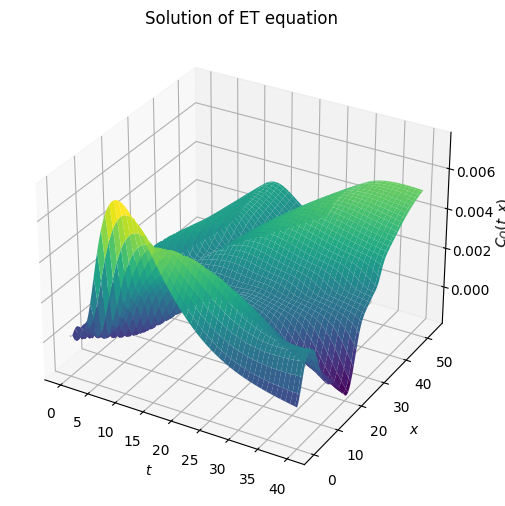

In [57]:
# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, Cq_plus, cmap='viridis');
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$C_Q(t,x)$')
ax.set_title('Solution of ET equation');

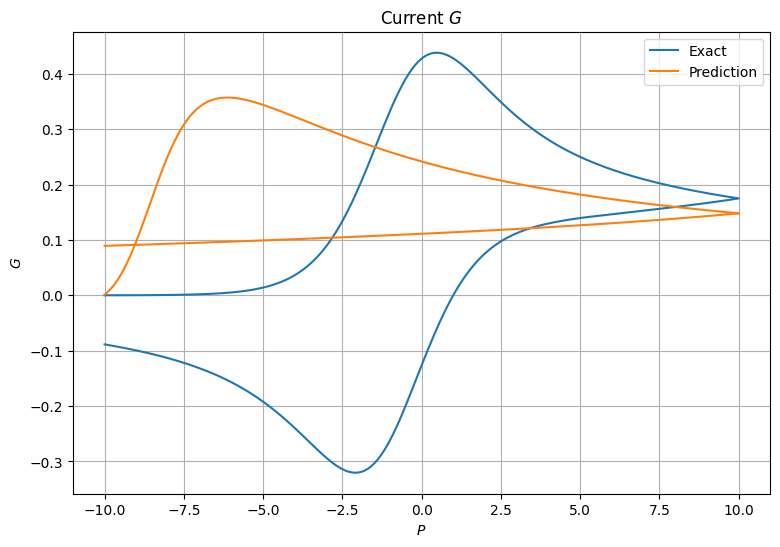

In [58]:
_, _, X, pot, G = read_data(D_plus=5, K0=10)

m = X.shape[0]

t_r = X[:, 1]
x_r = np.linspace(0, D_depth, m)*0.0

X = np.stack([x_r, t_r], axis=1)

def dydz(x, y):
    return dde.grad.jacobian(y, x, i=0, j=0)

G_hat = model.predict(X, operator=dydz)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
plt.plot(pot, G)
plt.plot(pot, G_hat)
plt.xlabel('$P$')
plt.ylabel('$G$')
plt.grid('on')
plt.title('Current $G$')
plt.legend(["Exact", "Prediction"])
plt.show()

## Second Approach

We consider only one robin boundary condition for $C_Q$ and we add the constraint $D\partial_z C_Q(t, 0) + D^+\partial_z C_{Q^+}(t, 0) = 0$
#### $L_{\theta} = \lambda L_{R} + \lambda_I L_{0} + \lambda_N L_{Neuman\_bc} + \lambda_R L_{Robin\_bc} + \lambda_G||\hat{G}||_p + \lambda_C||D\partial_z C_Q(t, 0) + D^+\partial_z C_{Q^+}(t, 0)||_p$

In [59]:
def robin_boundary_condition_combined(x, y, X):
    return dde.grad.jacobian(y, x, i=0, j=0) + dde.grad.jacobian(y, x, i=1, j=0)

robin_bc_combined = dde.icbc.OperatorBC(geomtime, robin_boundary_condition_combined, boundary_left)

In [60]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [ic1, ic2, neuman_bc1, neuman_bc2, robin_bc1, current_constraint, robin_bc_combined],
    num_domain=20000,
    num_boundary=1000,
    anchors=X,
    num_initial=1000,
    num_test=2000
)

In [61]:
layer_size = [2] + [20] * 3 + [12] * 3 + [2]
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
loss_weights = [1, 1, 1, 1, 1, 1, 1e-5, 1, 1]
model.compile("adam", lr=0.001, loss_weights=loss_weights)

Compiling model...
Building feed-forward neural network...
'build' took 0.228880 s

'compile' took 3.421637 s



In [ ]:
losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [2.71e-03, 5.85e-02, 1.11e-01, 1.13e+00, 9.12e-05, 1.03e-04, 1.25e+00, 1.30e-02, 1.14e-02]    [1.27e-03, 2.12e-03, 1.11e-01, 1.13e+00, 9.12e-05, 1.03e-04, 1.25e+00, 1.30e-02, 1.14e-02]    []  
1000      [5.28e-04, 1.21e-04, 2.00e-05, 1.25e-05, 1.13e-06, 1.59e-06, 1.10e-04, 4.69e-05, 3.76e-05]    [3.67e-04, 1.01e-04, 2.00e-05, 1.25e-05, 1.13e-06, 1.59e-06, 1.10e-04, 4.69e-05, 3.76e-05]    []  
2000      [3.63e-04, 6.07e-05, 7.56e-06, 3.69e-06, 9.22e-07, 7.59e-07, 4.68e-05, 1.65e-05, 9.39e-06]    [2.92e-04, 5.39e-05, 7.56e-06, 3.69e-06, 9.22e-07, 7.59e-07, 4.68e-05, 1.65e-05, 9.39e-06]    []  


In [ ]:
N = 100
m = 100

# Draw uniformly sampled collocation points
t_r = np.linspace(0, 2*t_lambda, N)
x_r = np.linspace(0, D_depth, m)
X, T = np.meshgrid(x_r, t_r)

Xgrid = np.vstack([X.flatten(), T.flatten()]).T
y_pred = model.predict(Xgrid)

# Reshape upred
Cq = y_pred[:, 0].reshape((m, N))
Cq_plus = y_pred[:, 1].reshape((m, N))

In [ ]:
import matplotlib.pyplot as plt

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, Cq, cmap='viridis');
ax.set_xlabel('$t$')
ax.set_ylabel('$z$')
ax.set_zlabel('$C_Q(t, x)$')
ax.set_title('Solution of ET equation');

In [ ]:
# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, Cq_plus, cmap='viridis');
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$C_Q(t,x)$')
ax.set_title('Solution of ET equation');

In [ ]:
_, _, X, pot, G = read_data(D_plus=5, K0=10)

m = X.shape[0]

t_r = X[:, 1]
x_r = np.linspace(0, D_depth, m)*0.0

X = np.stack([x_r, t_r], axis=1)

def dydz(x, y):
    return dde.grad.jacobian(y, x, i=0, j=0)

G_hat = model.predict(X, operator=dydz)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
plt.plot(pot, G)
plt.plot(pot, G_hat)
plt.xlabel('$P$')
plt.ylabel('$G$')
plt.grid('on')
plt.title('Current $G$')
plt.legend(["Exact", "Prediction"])
plt.show()